In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows',None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth',0)
import unicodedata

import matplotlib.pyplot as plt
import matplotlib as mpl

import numpy as np
np.set_printoptions(threshold='nan')

In [181]:
df = pd.read_csv('train.tsv', sep='\t', index_col =None)
df


,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20,Label,Id
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,1,10101
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,2,10102
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,1,10103
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,1,10104
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,2,10105
5,A14,36,A32,A46,9055,A65,A73,2,A93,A101,4,A124,35,A143,A153,1,A172,2,A192,A201,1,10106
6,A14,24,A32,A42,2835,A63,A75,3,A93,A101,4,A122,53,A143,A152,1,A173,1,A191,A201,1,10107
7,A12,36,A32,A41,6948,A61,A73,2,A93,A101,2,A123,35,A143,A151,1,A174,1,A192,A201,1,10108
8,A14,12,A32,A43,3059,A64,A74,2,A91,A101,4,A121,61,A143,A152,1,A172,1,A191,A201,1,10109
9,A12,30,A34,A40,5234,A61,A71,4,A94,A101,2,A123,28,A143,A152,2,A174,1,A191,A201,2,10110


In [ ]:
good = df[df["Label"]==1]    #good
bad = df[df["Label"]==2]    #bad


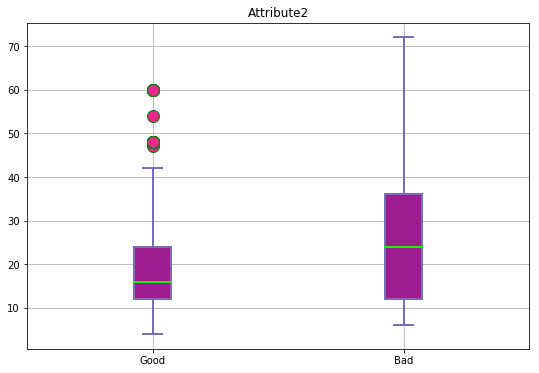

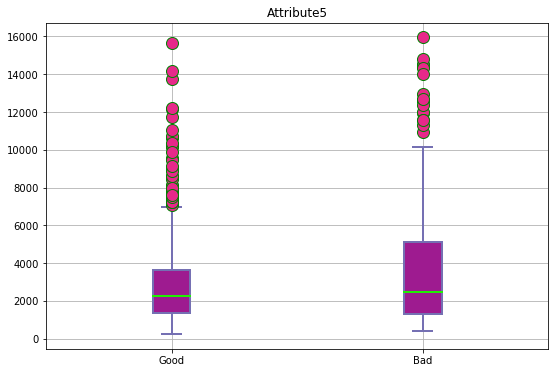

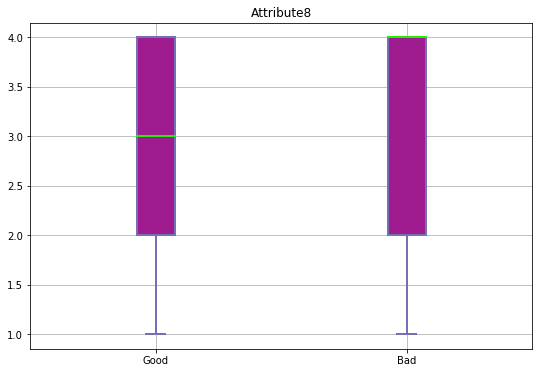

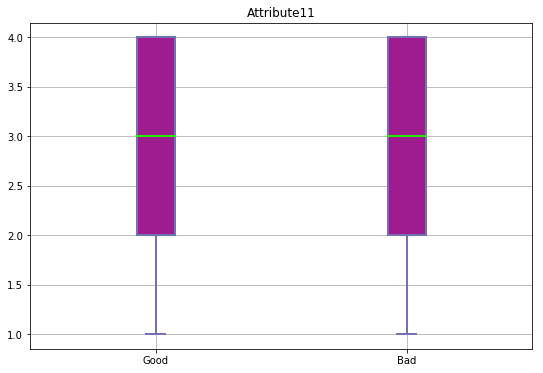

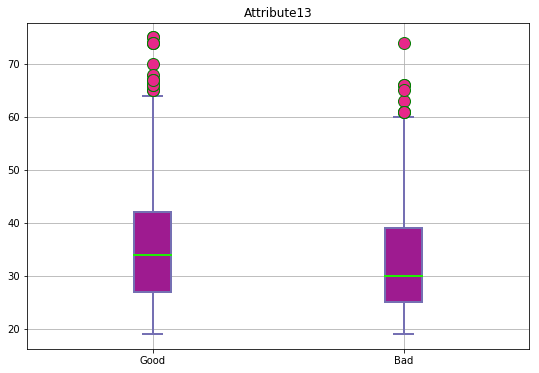

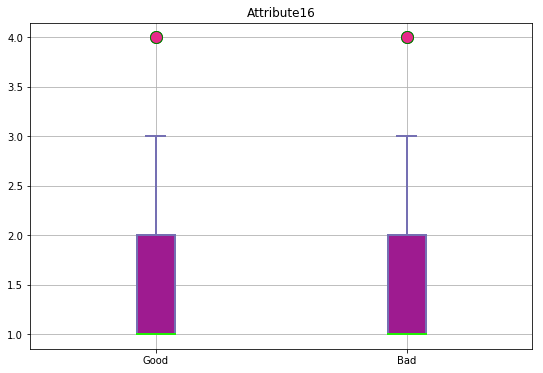

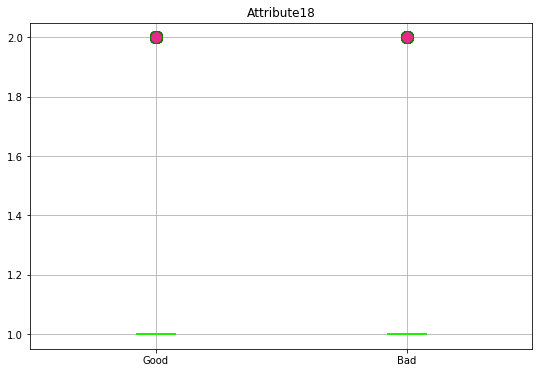

In [185]:
#Numericals
Attributes = ["Attribute2","Attribute5","Attribute8","Attribute11","Attribute13","Attribute16","Attribute18"]

for attribute in Attributes: 
    Attribute_good = good[[attribute]]
    Attribute_bad = bad[[attribute]]
    
    #convert data into list
    Attribute2_good = list(Attribute_good.values.flatten())
    Attribute2_bad = list(Attribute_bad.values.flatten())
    
    
    data_to_plot = [Attribute2_good, Attribute2_bad]

    # Create a figure instance
    fig = plt.figure(1, figsize=(9, 6))

    # Create an axes instance
    ax = fig.add_subplot(111)


    # Create the boxplot
    ## change the style of fliers and their fill
    flierprops = dict(marker='o', markerfacecolor='#e7298a', markersize=12,
                  linestyle='none', markeredgecolor='g') 
    
    #Create the boxplot
    bp = ax.boxplot(data_to_plot, patch_artist=True, flierprops= flierprops)
    
    #Change color

    ## change outline color, fill color and linewidth of the boxes
    for box in bp['boxes']:
        # change outline color
        box.set( color='#7570b3', linewidth=2)
        # change fill color
        box.set( facecolor = '#9e1b90' )

    ## change color and linewidth of the whiskers
    for whisker in bp['whiskers']:
        whisker.set(color='#7570b3', linewidth=2)

    ## change color and linewidth of the caps
    for cap in bp['caps']:
        cap.set(color='#7570b3', linewidth=2)

    ## change color and linewidth of the medians
    for median in bp['medians']:
        median.set(color='#20ef04', linewidth=2)

    ## change the style of fliers and their fill
    #for flier in bp['fliers']:
     #   flier.set(marker='o', color='#e7298a', alpha=0.5)
        
      

    #Set grid
    ax.grid()

    #Set labels
    ax.set_xticklabels(['Good', 'Bad'])    

    #Set title
    plt.title(attribute)
    plt.show()

    # Save the figure
    #fig.savefig('fig1.png', bbox_inches='tight')

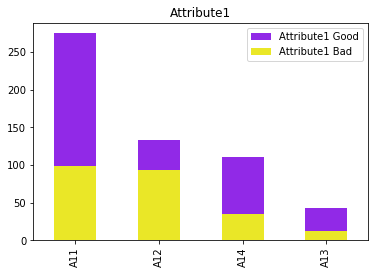

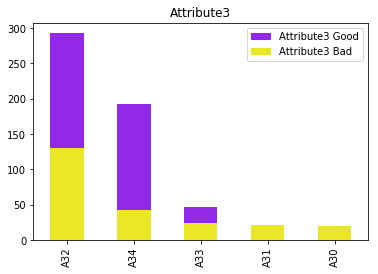

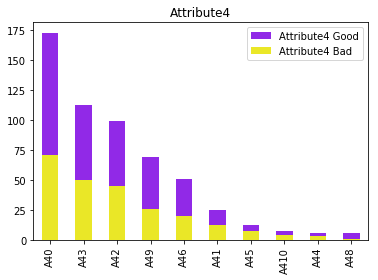

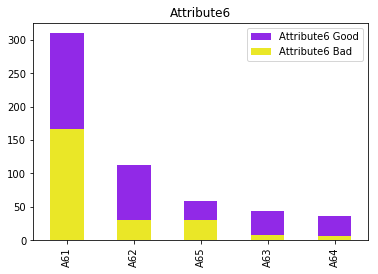

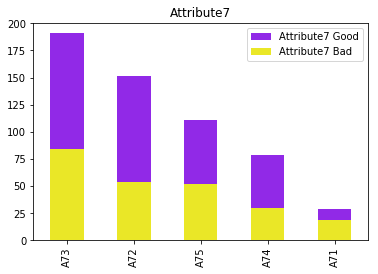

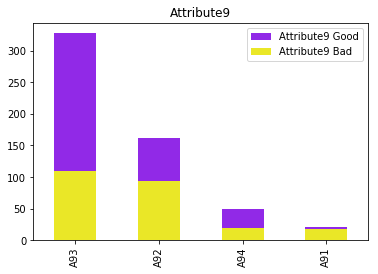

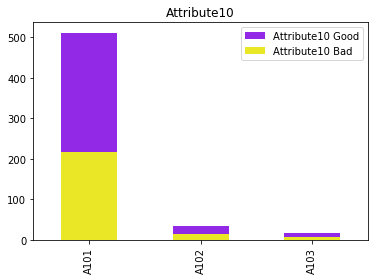

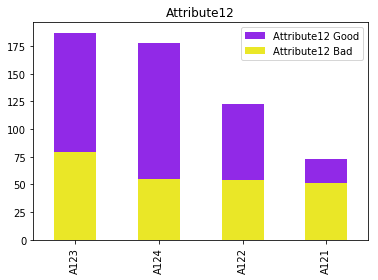

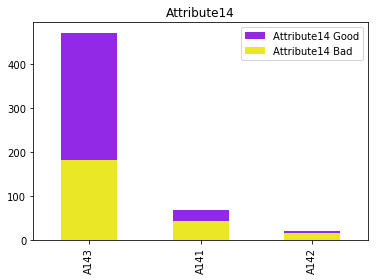

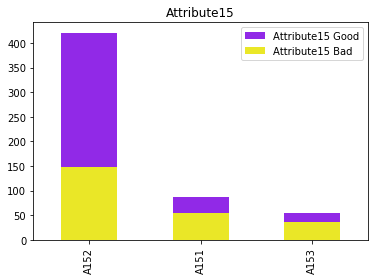

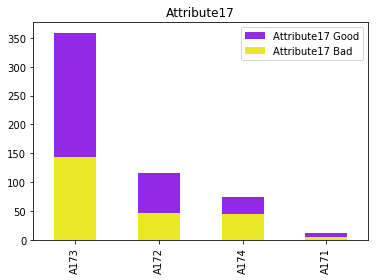

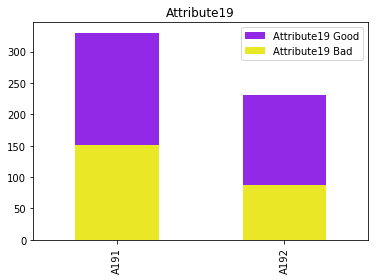

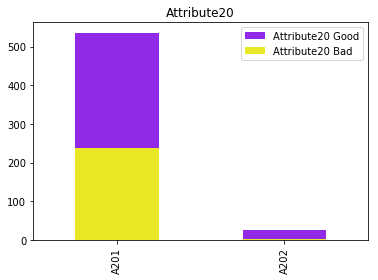

In [180]:
#for categorical data


attributesCategorical = ['Attribute1','Attribute3','Attribute4','Attribute6','Attribute7','Attribute9','Attribute10'
              ,'Attribute12','Attribute14','Attribute15','Attribute17','Attribute19','Attribute20']

for item in attributesCategorical:

    attributeGood = pd.Series(good[item])
    attributeBad = pd.Series(bad[item])
    stringGood = item + " Good"
    stringBad = item + " Bad"

    plt.title(item)
    attributeGood.value_counts().plot(kind='bar',label= stringGood, color = '#9129e7' )
    attributeBad.value_counts().plot(kind='bar',label= stringBad, color = '#eae727')
    plt.legend()
    plt.show()